# 🎵 Análisis de Datos de Spotify
Este notebook explica **cajas y bigotes, boxplots, correlación y mapas de calor**
usando el dataset de `spotify_tracks.csv`.

Incluye ejemplos en Python con **Pandas, Matplotlib y Seaborn**.

In [2]:
# 📦 Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

In [3]:
# 📂 Cargar dataset de Spotify desde la carpeta Datasources
from pathlib import Path
data_path = "penguins.csv"
df = pd.read_csv(data_path)
display(df.head())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Listar columnas del DataFrame para validar nombres
print(df.columns.tolist())

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


In [5]:
# 🔧 Preprocesamiento: limpiar y crear nuevas columnas
import numpy as np
df_clean = df.copy()
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean['bill_length_mm'] = df_clean['bill_length_mm'] / 1000.0
df_clean['bill_depth_mm'] = df_clean['bill_depth_mm'] / 1000.0
# Orden de géneros 
order_by_mass = df_clean.groupby('species')['body_mass_g'].median().sort_values(ascending=False).index
order_by_bill_lenght = df_clean.groupby('species')['bill_length_mm'].median().sort_values(ascending=False).index
print('Columnas finales:', df_clean.columns.tolist())
print('Géneros ordenados por masa:', list(order_by_mass))

Columnas finales: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
Géneros ordenados por masa: ['Gentoo', 'Adelie', 'Chinstrap']


## 1️⃣ Cajas y Bigotes
Las cajas y bigotes permiten **detectar la dispersión y los valores atípicos**.
- Caja = rango intercuartílico (Q1–Q3)
- Línea = mediana (Q2)
- Bigotes = datos dentro de 1.5 × IQR
- Puntos = valores atípicos (outliers)

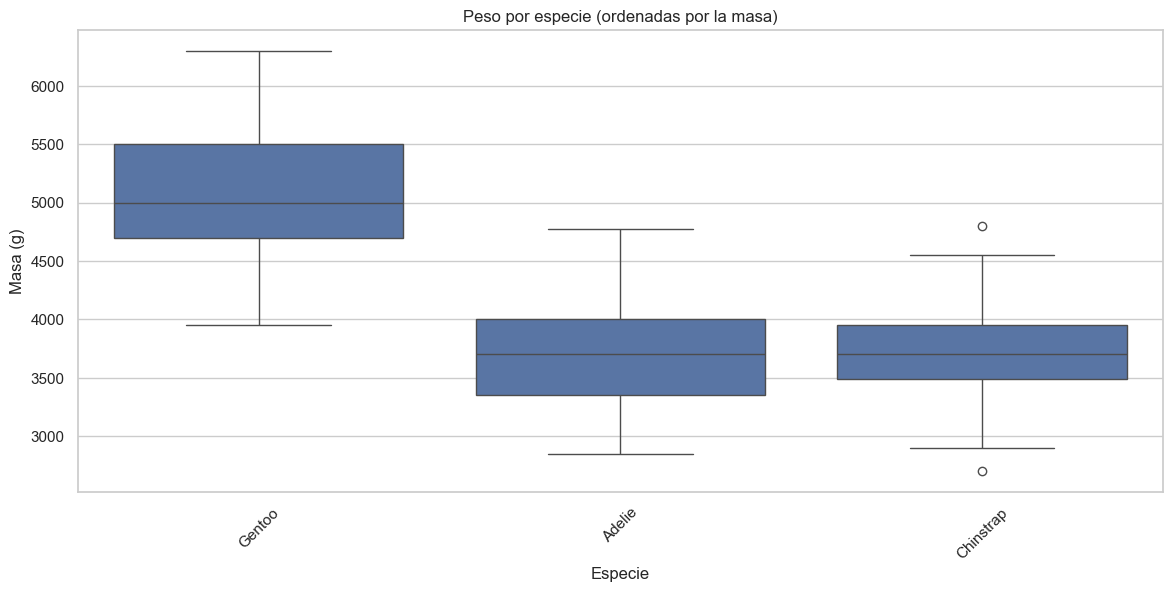

In [6]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_clean,
    x="species",
    y="body_mass_g",
    order= order_by_mass
)
plt.title("Peso por especie (ordenadas por la masa)")
plt.xticks(rotation=45)
plt.ylabel("Masa (g)")
plt.xlabel("Especie")
plt.show()


## 2️⃣ Boxplots
Un boxplot se utiliza para comparar **distribuciones entre categorías**.
En este caso, analizamos cómo varían las características físicas de los pingüinos (como la longitud del pico, la masa corporal o la longitud de las aletas) según la especie.
Por ejemplo:
Los Gentoo tienden a mostrar mayor masa corporal y aletas más largas.
Los Adélie presentan valores más bajos y menos dispersión.
Los Chinstrap suelen situarse en un rango intermedio, aunque con cierta variabilidad en la longitud del pico.

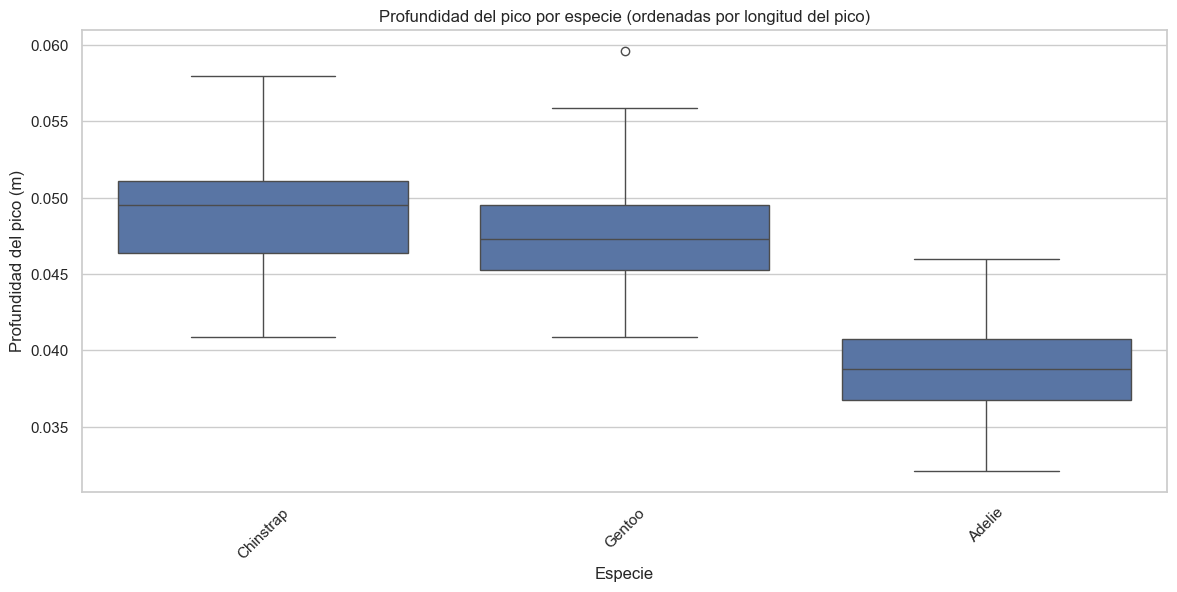

In [7]:
plt.figure(figsize=(14,6))
sns.boxplot(
    data=df_clean,
    x="species",
    y='bill_length_mm',
    order=order_by_bill_lenght
)
plt.title("Profundidad del pico por especie (ordenadas por longitud del pico)")
plt.xticks(rotation=45)
plt.ylabel("Profundidad del pico (m)")
plt.xlabel("Especie")
plt.show()

## 3️⃣ Correlación
La correlación mide **la relación lineal entre dos variables cuantitativas**.
-Relación positiva perfecta (ambas aumentan juntas).
−Relación negativa perfecta (una aumenta mientras la otra disminuye).
0 → no hay relación lineal.
Existe una correlación positiva alta entre longitud de aleta (flipper_length_mm) y masa corporal (body_mass_g) → los pingüinos más grandes suelen tener aletas más largas.
La longitud del pico (bill_length_mm) y la profundidad del pico (bill_depth_mm) tienden a mostrar una relación negativa moderada, indicando que los picos más largos tienden a ser menos profundos.

In [8]:
corr = df_clean[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]].corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## 3️⃣➕ Scatter plots con línea de tendencia
Los diagramas de dispersión permiten observar visualmente las relaciones entre pares de variables, junto con su línea de regresión.
Además, se muestra el coeficiente de correlación de Pearson (r) para cuantificar la fuerza y dirección de la relación:
r > 0 → relación positiva.
r < 0 → relación negativa.
r ≈ 0 → sin relación lineal clara.
Ejemplos de interpretación:
¿Los pingüinos con mayor masa corporal también tienen aletas más largas? (relación positiva fuerte).
¿Los pingüinos con picos más largos tienden a tener picos más delgados? (relación negativa)

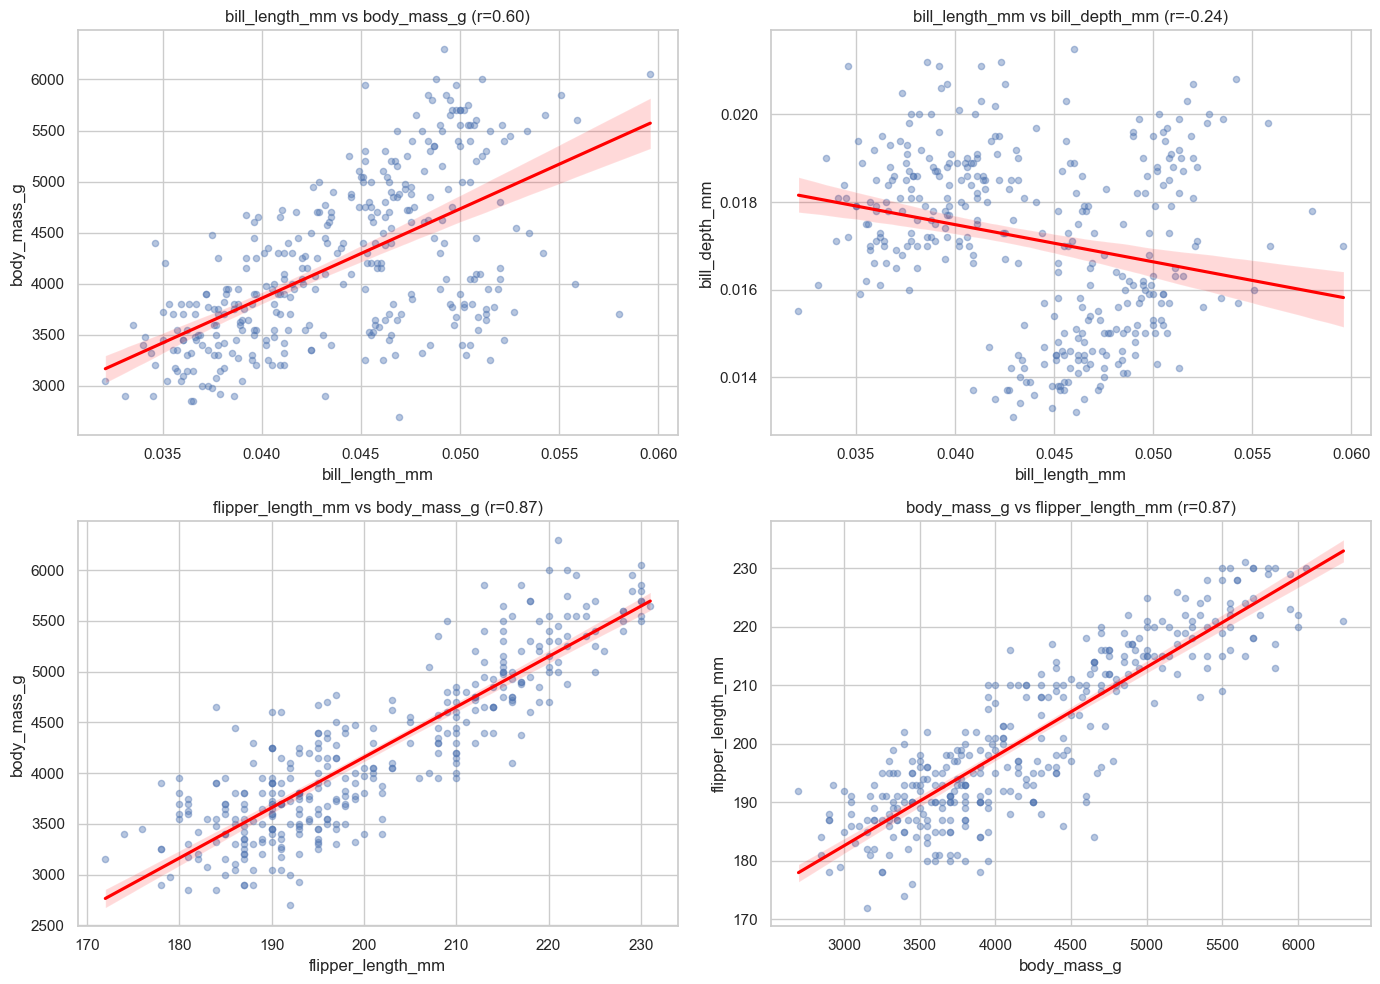


Interpretación rápida de correlaciones (scatter plots):
 - bill_length_mm vs body_mass_g: r=0.60 relación positiva (p=3.81e-34)
 - bill_length_mm vs bill_depth_mm: r=-0.24 relación negativa (p=1.12e-05)
 - flipper_length_mm vs body_mass_g: r=0.87 relación positiva (p=4.37e-107)
 - body_mass_g vs flipper_length_mm: r=0.87 relación positiva (p=4.37e-107)


In [10]:
# Scatter plots con líneas de tendencia y r (sin dependencia obligatoria de SciPy)
import seaborn as sns
import matplotlib.pyplot as plt

# Intentar importar pearsonr; si no existe SciPy, se calcula r sin p-value
try:
    from scipy.stats import pearsonr  # type: ignore
    _has_scipy = True
except ImportError:  # SciPy no instalado
    _has_scipy = False

pairs = [
    ("bill_length_mm", "body_mass_g"), 
    ("bill_length_mm", "bill_depth_mm"),
    ("flipper_length_mm", "body_mass_g"),
    ("body_mass_g", "flipper_length_mm")
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
interpretaciones_scatter = []

for ax, (x, y) in zip(axes, pairs):
    sub = df_clean[[x, y]].dropna()
    if len(sub) < 2:
        ax.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
        ax.set_axis_off()
        continue
    # Calcular correlación
    if _has_scipy:
        r, p = pearsonr(sub[x], sub[y])  # precisa p-value
    else:
        r = sub[x].corr(sub[y])  # Pearson por defecto
        p = float('nan')
    sns.regplot(data=sub, x=x, y=y, ax=ax,
                scatter_kws={'alpha': 0.4, 's': 20},
                line_kws={'color': 'red'})
    ax.set_title(f"{x} vs {y} (r={r:.2f})")
    # Interpretación básica
    if r > 0.1:
        sentido = 'positiva'
    elif r < -0.1:
        sentido = 'negativa'
    else:
        sentido = 'casi nula'
    if _has_scipy:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p={p:.3g})")
    else:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p=N/A, SciPy no instalado)")

plt.tight_layout()
plt.show()

print("\nInterpretación rápida de correlaciones (scatter plots):")
for linea in interpretaciones_scatter:
    print(" - " + linea)

if not _has_scipy:
    print("\nNota: Instala SciPy (pip install scipy) para obtener p-values.")

## 4️⃣ Mapas de Calor
Un **heatmap** nos permite visualizar la matriz de correlaciones.
Los colores indican si la relación es **positiva o negativa**.

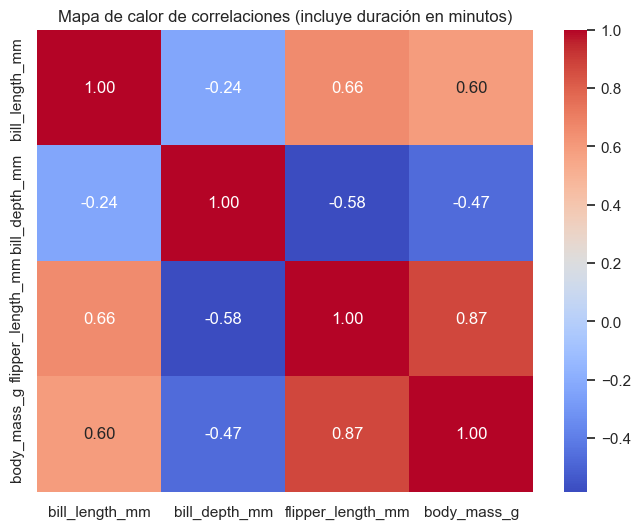

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluye duración en minutos)")
plt.show()

### 🧐 Interpretación del mapa de calor
El mapa de calor muestra la fuerza y dirección de la relación lineal entre las variables numéricas:
Los colores indican si la relación es positiva o negativa y qué tan fuerte es.
Interpretación del mapa de calor
El mapa de calor muestra la fuerza y dirección de la relación lineal entre las variables morfológicas de los pingüinos:
bill_length_mm: Longitud del pico.
bill_depth_mm: Profundidad del pico.
flipper_length_mm: Longitud de las aletas.
body_mass_g: Masa corporal.
Pautas para interpretarlo:
Celdas en rojo intenso → correlaciones positivas fuertes (ambas variables aumentan juntas, como flipper_length y body_mass).
Celdas en azul intenso → correlaciones negativas (una aumenta mientras la otra disminuye, como bill_length vs bill_depth).
Colores claros → relación débil o inexistente.
La celda siguiente genera un resumen dinámico de las correlaciones, destacando los pares más fuertes y las asociaciones más relevantes para cada variable.

In [12]:
# 🔄 Resumen dinámico de la matriz de correlación
import pandas as pd
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]].corr()

# Obtener pares únicos (triángulo superior sin diagonal)
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        a, b = cols[i], cols[j]
        pares.append((a, b, corr.iloc[i, j]))

# Ordenar por magnitud absoluta
pares_ord = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

# Clasificar niveles
niveles = {
    'muy fuerte (|r| >= 0.7)': [],
    'fuerte (0.5 <= |r| < 0.7)': [],
    'moderada (0.3 <= |r| < 0.5)': [],
    'débil (0.1 <= |r| < 0.3)': [],
    'casi nula (|r| < 0.1)': []
}
for a,b,r in pares:
    ar = abs(r)
    if ar >= 0.7: niveles['muy fuerte (|r| >= 0.7)'].append((a,b,r))
    elif ar >= 0.5: niveles['fuerte (0.5 <= |r| < 0.7)'].append((a,b,r))
    elif ar >= 0.3: niveles['moderada (0.3 <= |r| < 0.5)'].append((a,b,r))
    elif ar >= 0.1: niveles['débil (0.1 <= |r| < 0.3)'].append((a,b,r))
    else: niveles['casi nula (|r| < 0.1)'].append((a,b,r))

# Mejor asociación para cada variable
mejor_por_var = {}
for v in cols:
    mejores = []
    for a,b,r in pares:
        if a == v or b == v:
            mejores.append((a if b == v else b, r))
    if mejores:
        mejor_por_var[v] = sorted(mejores, key=lambda x: abs(x[1]), reverse=True)[0]

print('=== PARES ORDENADOS POR |r| (top 5) ===')
for a,b,r in pares_ord[:5]:
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {a} vs {b}: r={r:.2f} ({signo})')

print('\n=== DISTRIBUCIÓN POR NIVELES ===')
for nivel, lista in niveles.items():
    print(f' {nivel}: {len(lista)} pares')

print('\n=== MEJOR ASOCIACIÓN POR VARIABLE ===')
for var,(otro,r) in mejor_por_var.items():
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {var} con {otro}: r={r:.2f} ({signo})')

# Tabla resumen opcional
res_df = pd.DataFrame(pares_ord, columns=['var_a','var_b','r'])
res_df.head()

=== PARES ORDENADOS POR |r| (top 5) ===
 - flipper_length_mm vs body_mass_g: r=0.87 (positiva)
 - bill_length_mm vs flipper_length_mm: r=0.66 (positiva)
 - bill_length_mm vs body_mass_g: r=0.60 (positiva)
 - bill_depth_mm vs flipper_length_mm: r=-0.58 (negativa)
 - bill_depth_mm vs body_mass_g: r=-0.47 (negativa)

=== DISTRIBUCIÓN POR NIVELES ===
 muy fuerte (|r| >= 0.7): 1 pares
 fuerte (0.5 <= |r| < 0.7): 3 pares
 moderada (0.3 <= |r| < 0.5): 1 pares
 débil (0.1 <= |r| < 0.3): 1 pares
 casi nula (|r| < 0.1): 0 pares

=== MEJOR ASOCIACIÓN POR VARIABLE ===
 - bill_length_mm con flipper_length_mm: r=0.66 (positiva)
 - bill_depth_mm con flipper_length_mm: r=-0.58 (negativa)
 - flipper_length_mm con body_mass_g: r=0.87 (positiva)
 - body_mass_g con flipper_length_mm: r=0.87 (positiva)


,var_a,var_b,r
0,flipper_length_mm,body_mass_g,0.871202
1,bill_length_mm,flipper_length_mm,0.656181
2,bill_length_mm,body_mass_g,0.595110
3,bill_depth_mm,flipper_length_mm,-0.583851
4,bill_depth_mm,body_mass_g,-0.471916


In [ ]:
# 🗣️ Cinco oraciones de interpretación de la correlación
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g",	"sex"]].corr()
# Obtener pares únicos
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pares.append((cols[i], cols[j], corr.iloc[i, j]))

# 1. Mayor correlación absoluta
pareja_top = max(pares, key=lambda x: abs(x[2]))
# 2. Menor correlación absoluta
pareja_min = min(pares, key=lambda x: abs(x[2]))
# 3. Variable con mayor suma de |r| (influencia global)
influencia = {}
for v in cols:
    influencia[v] = sum(abs(corr[v].drop(v)))
var_mas_rel = max(influencia.items(), key=lambda x: x[1])
var_menos_rel = min(influencia.items(), key=lambda x: x[1])
# 4. Media de correlaciones con popularity
if '' in cols:
    media_pop = corr['popularity'].drop('popularity').mean()
else:
    media_pop = float('nan')

sentencias = []
# Oración 1
sentencias.append(f"La relación más fuerte es entre {pareja_top[0]} y {pareja_top[1]} (r={pareja_top[2]:.2f}), indicando asociación {'positiva' if pareja_top[2]>0 else 'negativa'} clara.")
# Oración 2
sentencias.append(f"La relación más débil aparece entre {pareja_min[0]} y {pareja_min[1]} (r={pareja_min[2]:.2f}), prácticamente sin dependencia lineal.")
# Oración 3
sentencias.append(f"La variable con mayor conectividad global es {var_mas_rel[0]} (suma de |r|={var_mas_rel[1]:.2f}), actuando como eje en el conjunto.")
# Oración 4
sentencias.append(f"La variable más independiente relativa es {var_menos_rel[0]}, con menor suma de correlaciones absolutas ({var_menos_rel[1]:.2f}).")
# Oración 5
sentencias.append(f"En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r={media_pop:.2f}), sugiriendo que ningún rasgo único domina totalmente la popularidad.")

for s in sentencias:
    print("- " + s)

- La relación más fuerte es entre flipper_length_mm y body_mass_g (r=0.87), indicando asociación positiva clara.
- La relación más débil aparece entre bill_length_mm y bill_depth_mm (r=-0.24), prácticamente sin dependencia lineal.
- La variable con mayor conectividad global es bill_length_mm (suma de |r|=nan), actuando como eje en el conjunto.
- La variable más independiente relativa es bill_length_mm, con menor suma de correlaciones absolutas (nan).
- En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r=nan), sugiriendo que ningún rasgo único domina totalmente la popularidad.


## ✅ Conclusiones
Los boxplots muestran cómo cada especie de pingüino difiere en tamaño y proporciones.
El análisis de correlación revela qué medidas corporales están más relacionadas entre sí, ayudando a entender patrones de crecimiento y morfología.
El heatmap ofrece una visión global y rápida de estas relaciones, facilitando la interpretación visual de las asociaciones biológicas.
Este tipo de análisis es fundamental en biología para identificar patrones entre especies, explorar variabilidad morfológica y entender relaciones funcionales dentro de una población.

In [ ]:
# 🤖 Resumen automático de insights
import numpy as np

summary = []

if 'df_clean' in globals():
    # Top géneros por mediana de body mass y bill length
    order_by_mass = df_clean.groupby('species')['body_mass_g'].median().sort_values(ascending=False)
    order_by_bill_length = df_clean.groupby('species')['bill_length_mm'].median().sort_values(ascending=False)

    # Correlaciones fuertes (absolutas > 0.5)
    strong_corr = corr.copy()
    strong_pairs = []
    for i, col in enumerate(strong_corr.columns):
        for j, row in enumerate(strong_corr.index):
            if j <= i:
                continue
            val = strong_corr.loc[row, col]
            if abs(val) >= 0.5:
                strong_pairs.append((row, col, round(val, 2)))

    # Outliers aproximados por especie en body_mass_g (IQR)
    outlier_counts = {}
    for g, sub in df_clean.groupby('species'):
        q1 = sub['body_mass_g'].quantile(0.25)
        q3 = sub['body_mass_g'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = sub[(sub['body_mass_g'] < lower) | (sub['body_mass_g'] > upper)]
        outlier_counts[g] = len(outliers)
    top_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:5]

    # Generar resumen
    summary.append('=== INSIGHTS AUTOMÁTICOS ===')
    summary.append('\nTop 5 especies por mediana de body mass:')
    summary.extend([f'  - {g}: {v:.2f} g' for g, v in list(order_by_mass.items())[:5]])

    summary.append('\nTop 5 especies por mediana de bill length:')
    summary.extend([f'  - {g}: {v:.3f} m' for g, v in list(order_by_bill_length.items())[:5]])
    if strong_pairs:
        summary.append('\nParejas con correlación fuerte (|r| >= 0.5):')
        for a, b, v in strong_pairs:
            summary.append(f'  - {a} vs {b}: r={v}')
    else:
        summary.append('\nNo se detectaron correlaciones con |r| >= 0.5.')

    summary.append('\nEspecies con mayor número de outliers (body mass):')
    for g, cnt in top_outliers:
        summary.append(f'  - {g}: {cnt} outliers')

else:
    summary.append('df_clean no está disponible. Ejecuta las celdas de preprocesamiento.')

print('\n'.join(summary))


=== INSIGHTS AUTOMÁTICOS ===

Top 5 especies por mediana de body mass:
  - Gentoo: 5000.00 g
  - Adelie: 3700.00 g
  - Chinstrap: 3700.00 g

Top 5 especies por mediana de bill length:
  - Chinstrap: 0.050 m
  - Gentoo: 0.047 m
  - Adelie: 0.039 m

Parejas con correlación fuerte (|r| >= 0.5):
  - flipper_length_mm vs bill_length_mm: r=0.66
  - body_mass_g vs bill_length_mm: r=0.6
  - flipper_length_mm vs bill_depth_mm: r=-0.58
  - body_mass_g vs flipper_length_mm: r=0.87

Especies con mayor número de outliers (body mass):
  - Chinstrap: 2 outliers
  - Adelie: 0 outliers
  - Gentoo: 0 outliers


In [ ]:
# 📝 Interpretación detallada de los gráficos (pingüinos)
interpretaciones = []

if 'df_clean' in globals():
    import numpy as np

    # 1. Boxplot body_mass_g por especie
    mass_median = df_clean.groupby('species')['body_mass_g'].median().sort_values(ascending=False)
    top_mass_species = mass_median.head(3)
    bottom_mass_species = mass_median.tail(3)
    rango_mass = round(mass_median.max() - mass_median.min(), 2)
    interpretaciones.append('1) Boxplot de body mass por especie:')
    interpretaciones.append(f'   • Especies con mayor mediana de body mass (top 3): {", ".join([f"{g} ({v} g)" for g,v in top_mass_species.items()])}.')
    interpretaciones.append(f'   • Especies con menor mediana de body mass (últimos 3): {", ".join([f"{g} ({v} g)" for g,v in bottom_mass_species.items()])}.')
    interpretaciones.append(f'   • Diferencia aproximada entre la mediana más alta y la más baja: {rango_mass} g.')
    interpretaciones.append('   • Los puntos fuera de los “bigotes” indican outliers: individuos inusualmente livianos o pesados.')

    # 2. Boxplot bill_length_mm por especie
    bill_median = df_clean.groupby('species')['bill_length_mm'].median().sort_values(ascending=False)
    top_bill_species = bill_median.head(3)
    bottom_bill_species = bill_median.tail(3)
    rango_bill = round(bill_median.max() - bill_median.min(), 3)
    interpretaciones.append('\n2) Boxplot de bill length por especie:')
    interpretaciones.append(f'   • Especies con mayor mediana de bill length (top 3): {", ".join([f"{g} ({v:.3f} m)" for g,v in top_bill_species.items()])}.')
    interpretaciones.append(f'   • Especies con menor mediana de bill length (últimos 3): {", ".join([f"{g} ({v:.3f} m)" for g,v in bottom_bill_species.items()])}.')
    interpretaciones.append(f'   • Diferencia aproximada entre la mediana más alta y la más baja: {rango_bill} m.')

    # 3. Correlaciones (heatmap)
    vars_corr = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
    corr_local = df_clean[vars_corr].corr()
    pares = []
    for i, a in enumerate(vars_corr):
        for j, b in enumerate(vars_corr):
            if j <= i:  # evitar duplicados y diagonales
                continue
            pares.append((a, b, corr_local.loc[a, b]))
    pares_orden = sorted(pares, key=lambda x: abs(x[2]), reverse=True)
    top_corr = [(a, b, round(v,2)) for a, b, v in pares_orden[:3]]
    interpretaciones.append('\n3) Correlaciones (tabla y heatmap):')
    for a, b, v in top_corr:
        sentido = 'positiva' if v > 0 else 'negativa'
        interpretaciones.append(f'   • {a} vs {b}: r={v} ({sentido}).')
    interpretaciones.append('   • Valores cercanos a 0 indican relación débil; colores más intensos en el heatmap resaltan asociaciones fuertes.')

    # 4. Outliers body_mass_g por especie (IQR)
    outlier_info = []
    for g, sub in df_clean.groupby('species'):
        q1 = sub['body_mass_g'].quantile(0.25)
        q3 = sub['body_mass_g'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outliers = sub[(sub['body_mass_g'] < lower) | (sub['body_mass_g'] > upper)]
        if len(sub) > 0:
            outlier_info.append((g, len(outliers), round(100 * len(outliers)/len(sub),1)))
    outlier_info_sorted = sorted(outlier_info, key=lambda x: x[1], reverse=True)[:3]
    interpretaciones.append('\n4) Outliers de body mass:')
    for g, c, pct in outlier_info_sorted:
        interpretaciones.append(f'   • {g}: {c} outliers (~{pct}% de la especie).')
    interpretaciones.append('   • Un porcentaje alto puede indicar individuos atípicos o errores de medición.')

    # 5. Síntesis global
    interpretaciones.append('\n5) Síntesis:')
    interpretaciones.append('   • Los boxplots permiten detectar especies extremas en tamaño y masa rápidamente.')
    interpretaciones.append('   • Las correlaciones identifican combinaciones de características físicas que podrían influir juntas (e.g., flipper_length y body_mass).')
    interpretaciones.append('   • Los outliers ayudan a focalizar posibles individuos atípicos para análisis cualitativo.')

else:
    interpretaciones.append('df_clean no está definido. Ejecuta las celdas anteriores antes de interpretar.')

print('\n'.join(interpretaciones))


1) Boxplot de body mass por especie:
   • Especies con mayor mediana de body mass (top 3): Gentoo (5000.0 g), Adelie (3700.0 g), Chinstrap (3700.0 g).
   • Especies con menor mediana de body mass (últimos 3): Gentoo (5000.0 g), Adelie (3700.0 g), Chinstrap (3700.0 g).
   • Diferencia aproximada entre la mediana más alta y la más baja: 1300.0 g.
   • Los puntos fuera de los “bigotes” indican outliers: individuos inusualmente livianos o pesados.

2) Boxplot de bill length por especie:
   • Especies con mayor mediana de bill length (top 3): Chinstrap (0.050 m), Gentoo (0.047 m), Adelie (0.039 m).
   • Especies con menor mediana de bill length (últimos 3): Chinstrap (0.050 m), Gentoo (0.047 m), Adelie (0.039 m).
   • Diferencia aproximada entre la mediana más alta y la más baja: 0.011 m.

3) Correlaciones (tabla y heatmap):
   • bill_length_mm vs flipper_length_mm: r=0.66 (positiva).
   • bill_length_mm vs body_mass_g: r=0.6 (positiva).
   • bill_length_mm vs sex: r=nan (negativa).
   • Va